In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

In [403]:
data_gas = pd.read_csv('Geochemistry Data/CNS_gas_train.csv')

In [6]:
data_oil = pd.read_csv('Geochemistry Data/CNS oil.csv')

In [438]:
data_gas.shape

(1709, 91)

In [405]:
data_gas.drop(0, axis=0, inplace=True)

In [410]:
data_gas = data_gas.reset_index(drop=True)

In [7]:
# data_oil.head()

,Country,WELL_NAME,OGA Well Name,WH_SITETYPE,WH_FIELD,WH_BLOCK,WH_LAT,WH_LONG,WH_COORD_SYS,WH_OPERATOR,...,MAI_MAII_RATIO,TAI_TAII_RATIO,C27MA_RATIO,TA_C26_C28_RATIO,TA_C27_C28_RATIO,TA_C28_C29_RATIO,META_C29_RATIO,META_C27_RATIO,META_C28_RATIO,TA_DINO_INDEX
0,NaN,Well name,Well name,Site type,Field name,Block name name,Latitude,Longitude,Location CRS,Operator,...,MA(I)/MA(I+II),TA(I)/TA(I+II),MA C27 V/(I+V) 20S,TA C26 20S/C28 20S,TA C27 20R/C28 20R,3Me TA C28 20R/C29 20R,(3/(3+4))MeTA C29 20R,(3+4)MeTA C27 20S/C29 20S,(3+4)Me TA C28 20R/C29 20R,TA Dinosteroid index
1,United Kingdom,021/25-ANASURIA,21/25-ANASURIA,WELL,NaN,021/25,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United Kingdom,021/25-ANASURIA,21/25-ANASURIA,WELL,NaN,021/25,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Kingdom,021/30-13A,21/30- 13A,WELL,NaN,021/30,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Kingdom,021/30-13A,21/30- 13A,WELL,NaN,021/30,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


predict "GAS_C1, GAS_C2, GAS_C3, GAS_IC4, GAS_NC4, GAS_IC5, GAS_NC5 "

In [440]:
y = data_gas.loc[:, ['GAS_C1', 'GAS_C2', 'GAS_C3', 'GAS_IC4', 'GAS_NC4', 'GAS_IC5', 'GAS_NC5']]
y = y.astype(float)

In [412]:
feat_full_list = []
for col in data_gas.columns:
    if col not in y.columns:
        feat_full_list.append(col)

In [445]:
X = data_gas.loc[:, feat_full_list]

In [414]:
num_cols = []
for i in range(len(X.columns)):
    if X.count()[i] > 1000:
        num_cols.append(X.count().index[i])

In [415]:
col1 = ['WH_LAT', 'WH_LONG', 'SH_DEPTH_TOP_FT', 'SH_DEPTH_BOT_FT', 'WH_TD_M', 'WH_DR_ELEV_M',
'C2_UNSAT', 'C3_UNSAT','CSIA_CONC_C1', 'CSIA_NC1', 'CSIA_NC2', 'CSIA_NC3', 'CSIA_IC4',
'CSIA_NC4', 'CSIA_IC5', 'CSIA_NC5']

In [446]:
X['WH_LAT'] = X['WH_LAT'].fillna(X['WH_LAT'].median()).astype(float)

In [448]:
X.iloc[1704,7] = 1.953815702

In [449]:
X['WH_LONG'] = X['WH_LONG'].fillna(X['WH_LONG'].median()).astype(float)

In [450]:
X = X[col1]

In [451]:
X = X.fillna(X.median())
X = X.astype(float)

In [432]:
# X.to_csv('main_X.csv', index=False)

In [503]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [508]:
from sklearn.preprocessing import normalize, scale, MinMaxScaler
normalized_X = normalize(X_full)
standardized_X = scale(X_full)
minmax_X = MinMaxScaler(X_full)

In [509]:
X_train, X_test, y_train, y_test = train_test_split(
    minmax_X, y, train_size=0.7, test_size=0.3, random_state=42)

regr_1 = LinearRegression()
regr_1.fit(X_train, y_train['GAS_NC5'])
y_1 = regr_1.predict(X_test)

print(r2_score(y_test['GAS_NC5'], y_1))

TypeError: Singleton array array(MinMaxScaler(copy=True,
             feature_range=         WH_LAT   WH_LONG  SH_DEPTH_TOP_FT  SH_DEPTH_BOT_FT    WH_TD_M  \
0     57.032223  1.953816          9814.00         12360.00  4953.6096   
1     57.032223  1.953816          9814.00         12360.00  4953.6096   
2     57.032223  1.953816          5400.00          5400.00  4953.6096   
3     57.032223  1.953816          6600.00          6600.00  4953.6096   
4     57.032223  1.953816          7300.00          7300.00  4953.6096   
...         ...       ...              ...              ...        ...   
1704  58.036853  1.953816          6542.00          6542.00  21...
1706   25.454545  0.253731     486.0       0.17       0.50       0.85  0.6   
1707   25.454545  0.088235     437.0       0.54       5.58       0.85  1.9   
1708   25.454545  0.064183     434.0       1.43      20.85       0.85  5.3   

         distance  rp_lab_cat  rp_method_cat  
0     1418.706639         1.0            1.0  
1     1418.706639         1.0            1.0  
2     2409.067579         1.0            0.0  
3     2410.561221         1.0            0.0  
4     2187.031227         1.0            1.0  
...           ...         ...            ...  
1704  1838.540894         1.0            1.0  
1705  1838.540894         1.0            1.0  
1706   103.190343         1.0            1.0  
1707   777.808906         1.0            0.0  
1708  2235.475869         1.0            1.0  

[1709 rows x 27 columns]), dtype=object) cannot be considered a valid collection.

In [380]:
add_feat = pd.read_csv('add_feat.csv')

In [456]:
X_full = pd.concat([X, add_feat], axis=1)

In [457]:
X_full.head()

,WH_LAT,WH_LONG,SH_DEPTH_TOP_FT,SH_DEPTH_BOT_FT,WH_TD_M,WH_DR_ELEV_M,C2_UNSAT,C3_UNSAT,CSIA_CONC_C1,CSIA_NC1,...,O_INDEX,P_INDEX,REV_TMAX,REV_TOTS1,REV_TOTS2,REV_TOTS3,TOC,distance,rp_lab_cat,rp_method_cat
0,57.032223,1.953816,9814.0,12360.0,4953.6096,43.5864,0.0019,0.0008,0.65,-42.1,...,93.5,0.114428,435.0,0.69,5.34,1.87,2.0,1418.706639,1.0,1.0
1,57.032223,1.953816,9814.0,12360.0,4953.6096,43.5864,0.0017,0.0007,0.65,-42.1,...,93.5,0.114428,435.0,0.69,5.34,1.87,2.0,1418.706639,1.0,1.0
2,57.032223,1.953816,5400.0,5400.0,4953.6096,43.5864,0.0580,0.0240,1.70,-70.8,...,NaN,0.041935,429.0,0.26,5.94,NaN,3.2,2409.067579,1.0,0.0
3,57.032223,1.953816,6600.0,6600.0,4953.6096,43.5864,0.0010,0.0007,0.97,-69.8,...,NaN,0.035522,435.0,0.33,8.96,NaN,5.2,2410.561221,1.0,0.0
4,57.032223,1.953816,7300.0,7300.0,4953.6096,43.5864,0.0028,0.0014,0.72,-67.7,...,210.0,0.186364,434.0,0.41,1.79,2.31,1.1,2187.031227,1.0,1.0


In [464]:
X_full = X_full.fillna(X_full.median())
X_full = X_full.astype(float)

In [505]:
y_train

,GAS_C1,GAS_C2,GAS_C3,GAS_IC4,GAS_NC4,GAS_IC5,GAS_NC5
782,97.900,0.9100,0.5500,0.2900,0.1400,0.0960,0.0340
806,93.900,4.6000,0.9200,0.0950,0.1700,0.0470,0.0550
855,92.400,5.8000,1.2000,0.1100,0.2400,0.0460,0.0650
1029,93.700,5.0000,0.9700,0.0880,0.1600,0.0300,0.0360
654,79.800,8.8000,3.0000,0.2900,0.6900,0.1100,0.2300
...,...,...,...,...,...,...,...
1130,90.613,6.0247,1.7767,0.2793,0.6784,0.2611,0.3668
1294,84.000,10.0000,3.0000,0.3800,0.9900,0.2300,0.3800
860,91.100,6.7000,1.6000,0.1500,0.3000,0.0540,0.0660
1459,81.000,10.4000,5.9000,0.5900,1.3000,0.2500,0.3500


In [519]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors = 22)

model.fit(X_train, y_train['GAS_C1'])
pred=model.predict(X_test) #make prediction on test set
error = (mean_squared_error(y_test['GAS_C1'],pred)) #calculate rmse
rmse_val.append(error) #store rmse values
print(error)

187.28090982675582


In [521]:
X_train, X_test, y_train, y_test = train_test_split(
    standardized_X, y, train_size=0.7, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train['GAS_C1'])
pred = model.predict(X_test)

print(mean_squared_error(y_test['GAS_C1'], pred))

186.5971121092223


In [491]:
params = {'n_estimators': 100,
          'max_depth': 20,
          'max_features': 5,
          'bootstrap': True,
          'random_state': 42}

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3, random_state=42)

model = RandomForestRegressor(**params)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(mean_squared_error(y_test, pred))

17.911960330172636


In [498]:
print(mean_squared_error(y_test, pred, multioutput='raw_values'))
print(mean_absolute_error(y_test, pred, multioutput='raw_values'))

[1.14191254e+02 5.50599829e+00 4.34766619e+00 1.05011259e-01
 9.07545477e-01 9.84666446e-02 2.27780288e-01]
[5.04934305 1.50996343 1.04119359 0.15279976 0.38385345 0.11664376
 0.16600719]


In [266]:
pd.DataFrame(y_rf).mean()

0    84.379966
1     7.277108
2     2.892459
3     0.346774
4     0.830952
5     0.214379
6     0.297829
dtype: float64

In [267]:
y_test.mean()

GAS_C1     84.526795
GAS_C2      7.221966
GAS_C3      2.867790
GAS_IC4     0.345457
GAS_NC4     0.819712
GAS_IC5     0.212299
GAS_NC5     0.279279
dtype: float64

In [232]:
import lightgbm as lgb

In [501]:
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, train_size=0.7, test_size=0.3, random_state=42)

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train['GAS_C1'])
lgb_eval = lgb.Dataset(X_test, y_test['GAS_C1'], reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 20,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
print(mean_squared_error(y_test['GAS_C1'], y_pred))

Starting training...
[1]	valid_0's l1: 9.11821	valid_0's l2: 221.713
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 8.88537	valid_0's l2: 214.217
[3]	valid_0's l1: 8.67061	valid_0's l2: 207.196
[4]	valid_0's l1: 8.48517	valid_0's l2: 201.512
[5]	valid_0's l1: 8.31127	valid_0's l2: 195.707
[6]	valid_0's l1: 8.14948	valid_0's l2: 191.323
[7]	valid_0's l1: 8.04219	valid_0's l2: 188.104
[8]	valid_0's l1: 7.90962	valid_0's l2: 185.073
[9]	valid_0's l1: 7.79321	valid_0's l2: 182.355
[10]	valid_0's l1: 7.69943	valid_0's l2: 179.975
[11]	valid_0's l1: 7.59315	valid_0's l2: 177.273
[12]	valid_0's l1: 7.51216	valid_0's l2: 174.588
[13]	valid_0's l1: 7.39634	valid_0's l2: 171.421
[14]	valid_0's l1: 7.28979	valid_0's l2: 168.246
[15]	valid_0's l1: 7.18995	valid_0's l2: 165.979
[16]	valid_0's l1: 7.10134	valid_0's l2: 163.481
[17]	valid_0's l1: 7.02154	valid_0's l2: 161.32
[18]	valid_0's l1: 6.9587	valid_0's l2: 159.625
[19]	valid_0's l1: 6.88518	valid_0's l2: 157.587

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def plotImp(model, X , num = 20):
    feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':X.columns})
    plt.figure(figsize=(40, 20))
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()

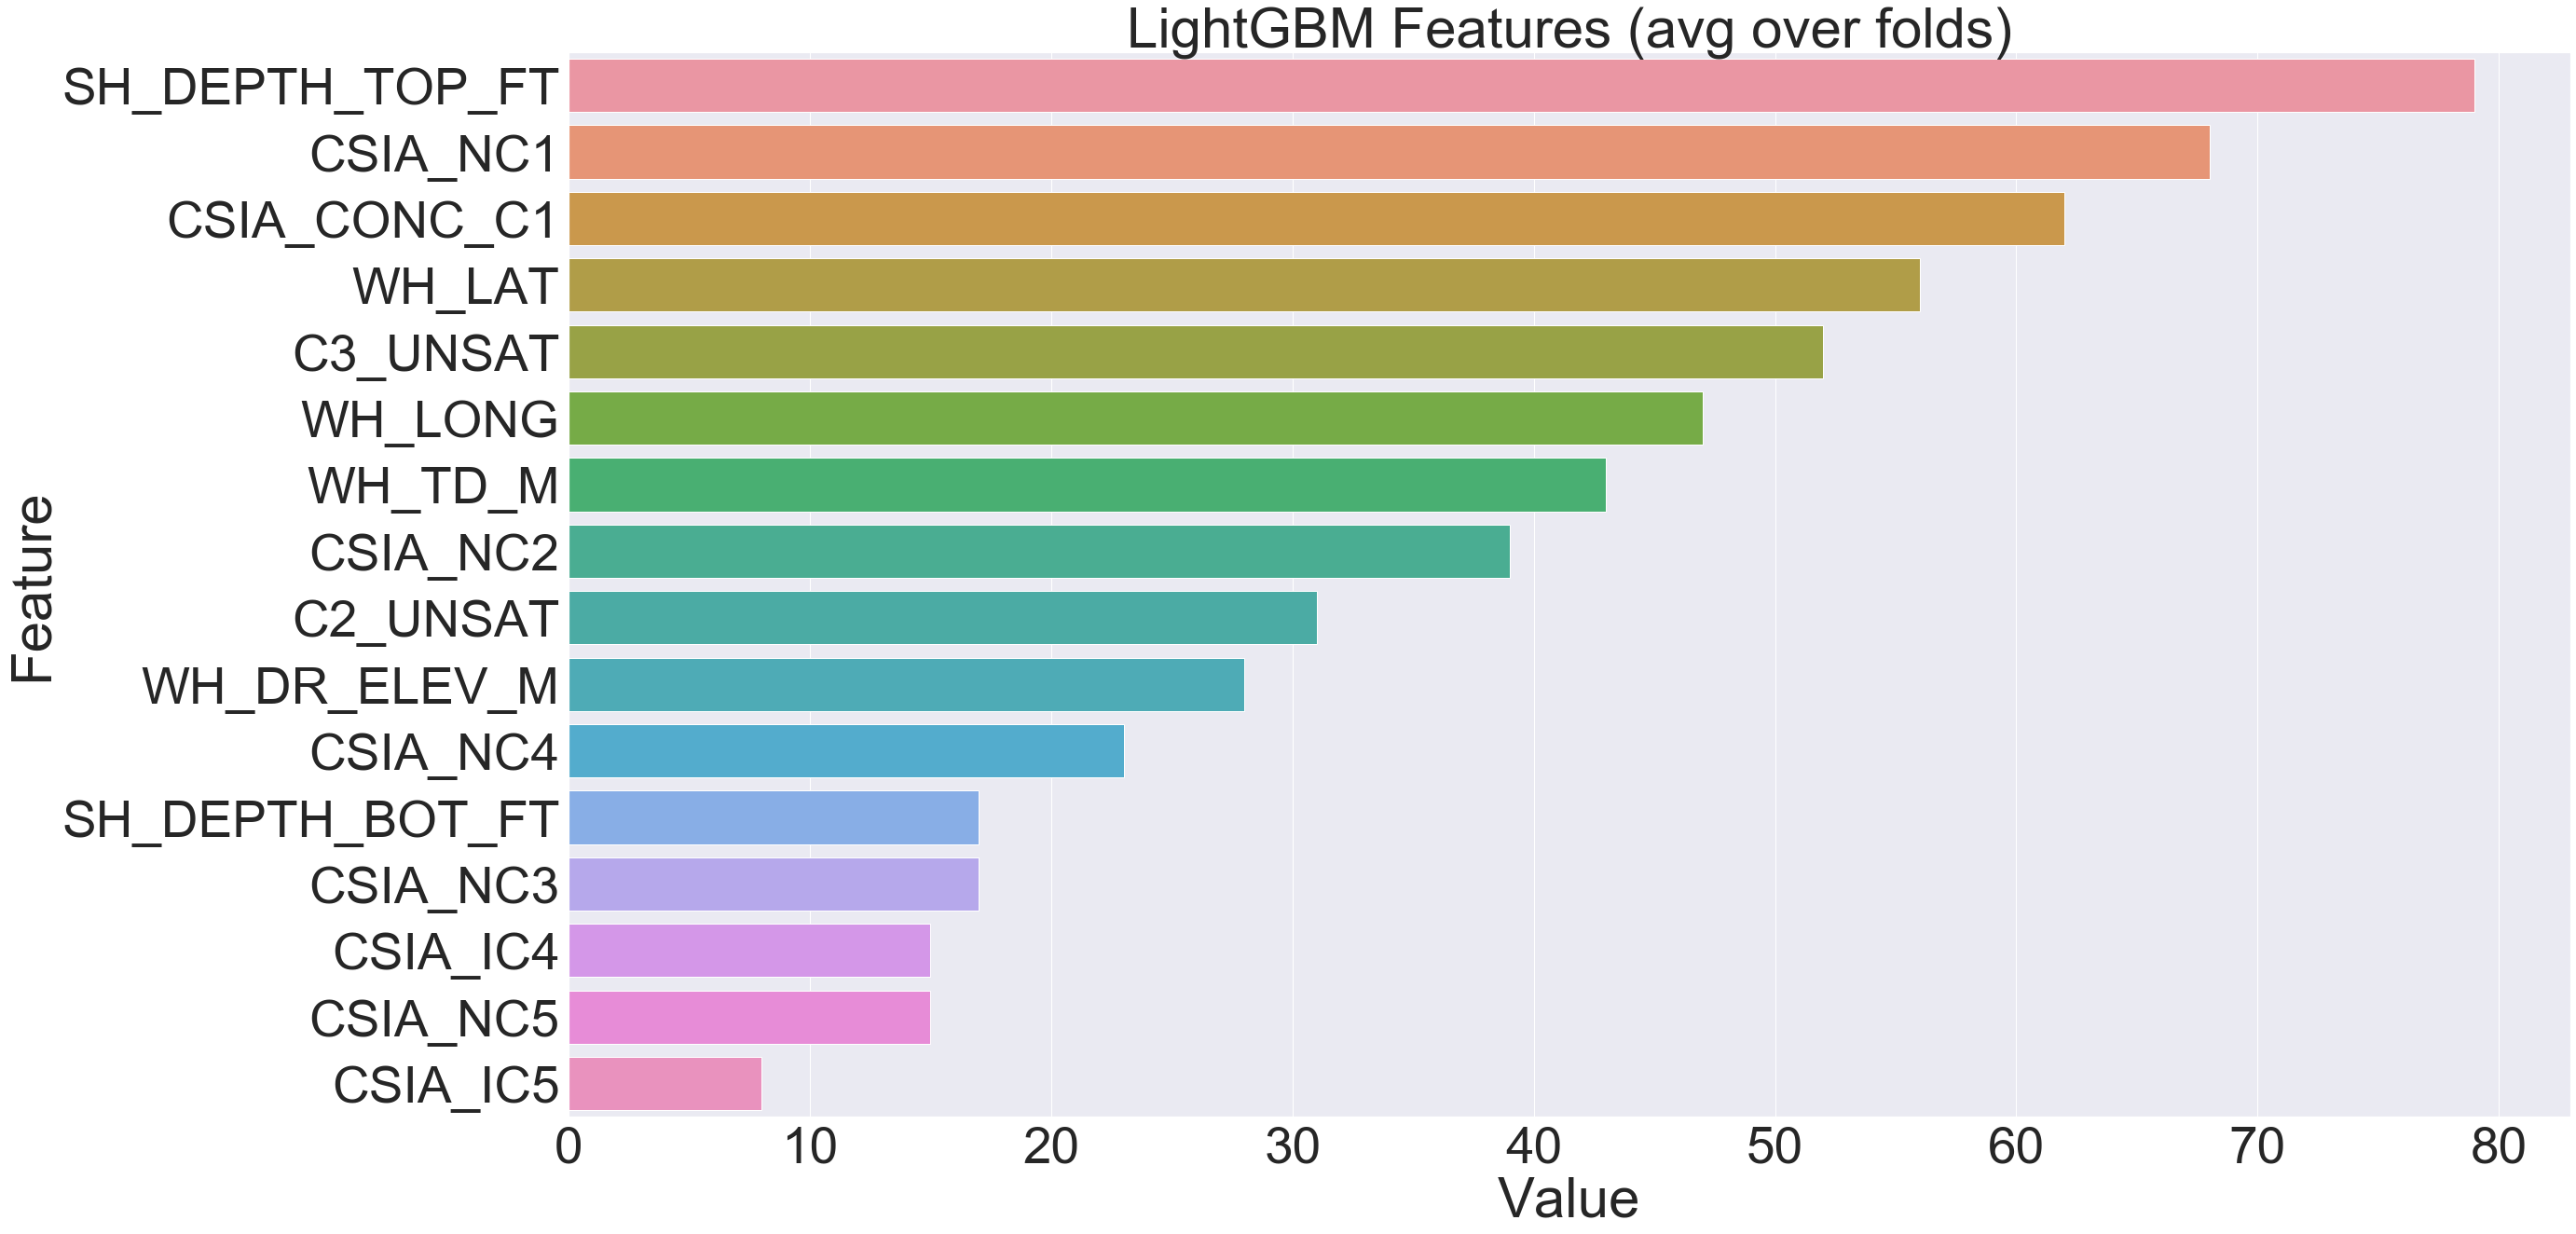

In [304]:
plotImp(gbm, X)

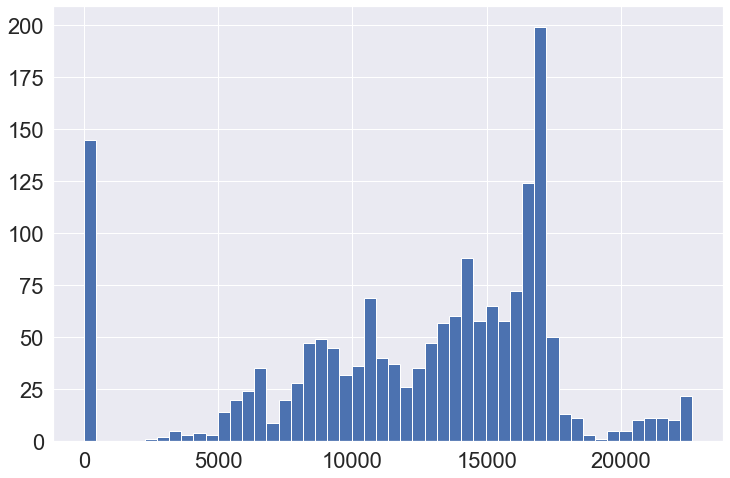

In [310]:
sns.set(font_scale = 2)
plt.figure(figsize=(12, 8))
X['SH_DEPTH_TOP_FT'].hist(bins=50)

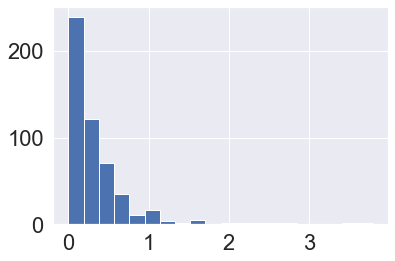

In [339]:
y_test['GAS_IC4'].hist(bins=20)

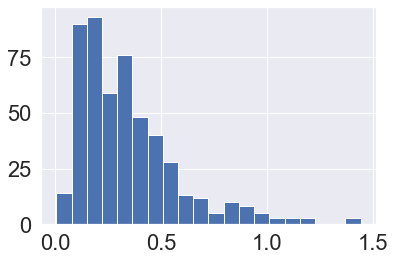

In [341]:
pd.DataFrame(y_rf)[3].hist(bins=20)

In [280]:
data_for_feat = data_gas.loc[1:, ['WH_LAT', 'WH_LONG', 'SH_DEPTH_TOP_FT', 'SH_FORM']]

In [287]:
data_for_feat.loc[1705,'WH_LONG'] = -0.891146243

In [290]:
data_for_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1709 entries, 1 to 1709
Data columns (total 4 columns):
WH_LAT             1680 non-null object
WH_LONG            1680 non-null object
SH_DEPTH_TOP_FT    1709 non-null object
SH_FORM            1386 non-null object
dtypes: object(4)
memory usage: 53.5+ KB


In [291]:
data_for_feat.to_csv('data_for_feat.csv')

In [334]:
dict(zip(X.columns, regr_rf.feature_importances_))

[('WH_LAT', 0.06136321796167556),
 ('WH_LONG', 0.0657873571103966),
 ('SH_DEPTH_TOP_FT', 0.07108895686288136),
 ('SH_DEPTH_BOT_FT', 0.07043822803890244),
 ('WH_TD_M', 0.08680712463875244),
 ('WH_DR_ELEV_M', 0.08298111600008182),
 ('C2_UNSAT', 0.048886131943027385),
 ('C3_UNSAT', 0.05181437757207044),
 ('CSIA_CONC_C1', 0.09006059296427678),
 ('CSIA_NC1', 0.11437986812201048),
 ('CSIA_NC2', 0.06642105852020103),
 ('CSIA_NC3', 0.0397700841974984),
 ('CSIA_IC4', 0.03425009272446603),
 ('CSIA_NC4', 0.04057079673162014),
 ('CSIA_IC5', 0.028870532359333134),
 ('CSIA_NC5', 0.046510464252806)]

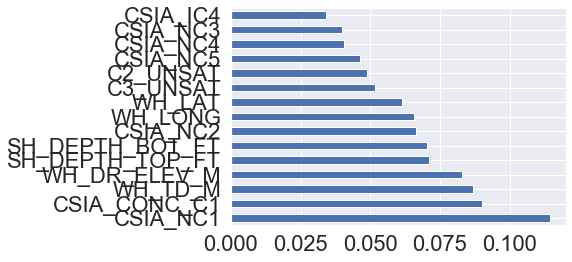

In [338]:
feat_importances = pd.Series(regr_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [522]:
X_full.to_csv('full_data.csv', index=False)